In [3]:
import sweetviz#for eda
import pandas as pd #for data manipulation
import pickle #to pickle the model. converts into bytesream used to create a model file which will be used while deploying using any web framework.

#read file
df = pd.read_csv("ipl.csv")

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
#remove unwanted columns
col_to_remove = ["venue", "mid", "batsman", "bowler", "striker", "non-striker"]
df.drop(col_to_remove, axis=1, inplace= True)

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
df["bowl_team"].uniqueue()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
#teams playing in 2020
teams_2020 = ['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings','Sunrisers Hyderabad']

In [14]:
#remove teams which are not present in teams playing in 2020
df = df[df.bat_team.isin(teams_2020)& df['bowl_team'].isin(teams_2020)]

In [18]:
#check for updated teams
print(df.bat_team.unique())
print(df.bat_team.unique())


['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


In [20]:
ipl_report = sweetviz.analyze([df, "IPL data"],target_feat="total")

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [21]:
ipl_report.show_html('IPL_EDA.html')

In [23]:
#inorder to predict the score we atleast require 5 overs of data. we remove first 5 overs of data in every match.
df = df[df['overs']>=5.0]

In [30]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [38]:
#to print data type of all columns in a dataframe
df.dtypes

date               object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [40]:
from datetime import datetime
df.date = df.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [42]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [53]:
#apply one hot encoding on teams
df1 = pd.get_dummies(data= df, columns= ['bat_team', 'bowl_team'])

In [54]:
df1.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df1.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [59]:
#rearrange the columns
df2 = df1[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]


In [60]:
df2.columns

Index(['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [61]:
#X_train = df1.drop(labels='total', axis=1)[df1['date'].dt.year <= 2016]
X_train = df1.drop(labels='total', axis=1)[df1['date'].dt.year <= 2016]
X_test = df1.drop(labels = 'total', axis= 1)[df1['date'].dt.year>= 2017]

In [62]:
y_train = df1[df1['date'].dt.year <= 2016]['total'].values
y_test = df1[df1['date'].dt.year >= 2017]['total'].values

In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37330, 22) (2778, 22) (37330,) (2778,)


In [64]:
X_train.drop(labels = 'date', axis =1, inplace =True)
X_test.drop(labels = 'date', axis =1, inplace =True)

In [65]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(37330, 21) (2778, 21) (37330,) (2778,)


# linear regression

In [147]:
#Model Building
#linear regression
import sklearn
from sklearn.linear_model import LinearRegression
#create base model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [148]:
#create pickle file
file = open("first-innings-score-lr-model.pkl", "wb")

#dump information to that file
pickle.dump(regressor, file)

In [149]:
prediction = regressor.predict(X_test)


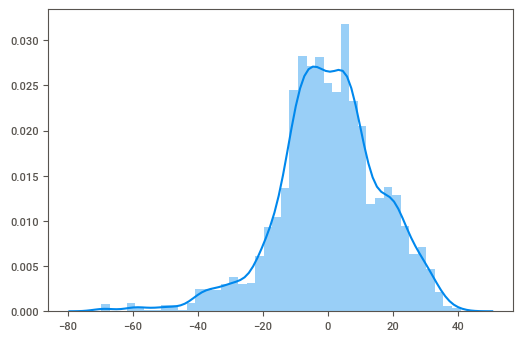

In [150]:
import seaborn as sns
sns.distplot(y_test - prediction)
#distplot gives plot of fiffernece between actual and predcited/error
#the plot gives gaussian distribution

In [151]:
from sklearn import metrics
import numpy as np
print('MAE : ',metrics.mean_absolute_error(y_test, prediction))
print('MSE : ',metrics.mean_squared_error(y_test, prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE :  12.118617546193244
MSE :  251.0079231041727
RMSE :  15.843229566732052


In [152]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, prediction)
print(coefficient_of_dermination)

0.7522633566350544


# Ridge regression

In [97]:
#we can do with linear regression/logistic regression/Random forest/Xg boost/Ridge/lasso

In [153]:
##Ridge regression
import sklearn
from sklearn.linear_model import ridge
from sklearn.model_selection import RandomizedSearchCV


In [154]:
#using randomized Search CV for hyper parameter tuning as it is faster than gird search.

ridge=linear_model.Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5, verbose= 2)
ridge_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=55 ........................................................
[CV] ......................................... alpha=55, total=   0.0s
[CV] alpha=55 ........................................................
[CV] ......................................... alpha=55, total=   0.0s
[CV] alpha=55 ........................................................
[CV] ......................................... alpha=55, total=   0.0s
[CV] alpha=55 ........................................................
[CV] ......................................... alpha=55, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=55 ........................................................
[CV] ......................................... alpha=55, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=1e-08 .....................................................
[CV] ...................................... alpha=1e-08, total=   0.0s
[CV] 

c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.50306e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58475e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.54634e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.55239e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.5438e-18): result may not be accurate

[CV] ...................................... alpha=1e-10, total=   0.0s
[CV] alpha=1e-10 .....................................................
[CV] ...................................... alpha=1e-10, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.2s finished


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50, 55, 60]},
                   scoring='neg_mean_squared_error', verbose=2)

In [164]:
#create pickle file
file = open("first-innings-score-ridge-model.pkl", "wb")
pickle.dump(regressor, file)

In [155]:
print(ridge_regressor.best_params_) #### best paramter
print(ridge_regressor.best_score_) #### best score

{'alpha': 55}
-328.31190297844057


In [156]:
prediction = ridge_regressor.predict(X_test)

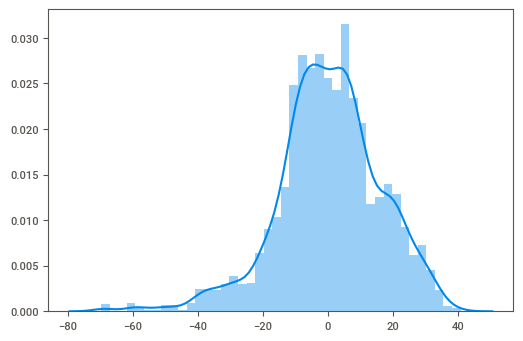

In [157]:
import seaborn as sns
sns.distplot(y_test - prediction)
#distplot gives plot of fiffernece between actual and predcited/error
#the plot gives gaussian distribution

In [158]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('MAE : ',metrics.mean_absolute_error(y_test, prediction))
print('MSE : ',metrics.mean_squared_error(y_test, prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

coefficient_of_dermination = r2_score(y_test, prediction)
print("R Square :",coefficient_of_dermination)

MAE :  12.116819428497799
MSE :  251.0408777759893
RMSE :  15.844269556403958
R Square : 0.7522308314474903


# Lasso Regression 

In [165]:
#similar to ridge regression
import sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

In [166]:
#using randomized Search CV for hyper parameter tuning as it is faster than gird search.

lasso=linear_model.Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60]}
lasso_regressor=RandomizedSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5, verbose= 2)
lasso_regressor.fit(X_train,y_train)

#lasso regression is slower compared to linear or ridge regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=20 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.1s
[CV] alpha=35 ........................................................
[CV] .

c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589202.6127607403, tolerance: 2529.9556965945617
  positive)


[CV] ...................................... alpha=1e-08, total=   4.0s
[CV] alpha=1e-08 .....................................................


c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482835.83658714686, tolerance: 2547.0380710286645
  positive)


[CV] ...................................... alpha=1e-08, total=   4.0s
[CV] alpha=1e-08 .....................................................


c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253599.4863201119, tolerance: 2667.8126904366454
  positive)


[CV] ...................................... alpha=1e-08, total=   3.9s
[CV] alpha=1e-08 .....................................................


c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273552.7611114783, tolerance: 2712.3488913976694
  positive)


[CV] ...................................... alpha=1e-08, total=   3.9s
[CV] alpha=1e-08 .....................................................


c:\users\saurabh.singh\anaconda3\envs\ipl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328228.17936920375, tolerance: 2646.143766019288
  positive)


[CV] ...................................... alpha=1e-08, total=   4.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.8s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.8s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.8s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.8s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   1.4s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.8s finished


RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50, 55, 60]},
                   scoring='neg_mean_squared_error', verbose=2)

In [167]:
print(lasso_regressor.best_params_) #### best paramter
print(lasso_regressor.best_score_) #### best score
predictor = lasso_regressor.predict(X_test)

{'alpha': 1}
-320.8221491680912


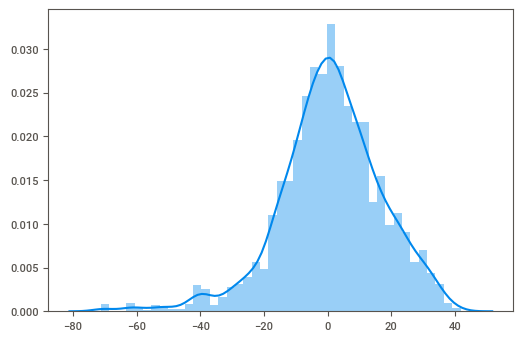

In [168]:
import seaborn as sns
sns.distplot(y_test - predictor)
#distplot gives plot of fiffernece between actual and predcited/error
#the plot gives gaussian distribution

In [169]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('MAE : ',metrics.mean_absolute_error(y_test, predictor))
print('MSE : ',metrics.mean_squared_error(y_test, predictor))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, predictor)))

coefficient_of_dermination = r2_score(y_test, predictor)
print("R Square :",coefficient_of_dermination)

MAE :  12.213583996827493
MSE :  262.36538279606964
RMSE :  16.19769683615759
R Square : 0.7410539138954501


In [173]:
import pickle
#open a file where you want to store the data
file = open("lasso_reg1.pkl", "wb")
pickle.dump(lasso_regressor, file)